#üìå Extracci√≥n

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_json('TelecomX_Data.json', )
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#üîß Transformaci√≥n

In [8]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_final = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

df_final


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

In [9]:
df_final.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [10]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [11]:
df_final.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [12]:
df_final['Cuentas_Diarias'] = round(df_final['Charges.Monthly']/30,2)
df_final = df_final.replace({'Yes': 1, 'No': 0})
df_final

C:\Users\User\AppData\Local\Temp\ipykernel_20924\548288013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace({'Yes': 1, 'No': 0})


customerID Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     0002-ORFBO     0  Female              0        1           1       9   
1     0003-MKNFE     0    Male              0        0           0       9   
2     0004-TLHLJ     1    Male              0        0           0       4   
3     0011-IGKFF     1    Male              1        1           0      13   
4     0013-EXCHZ     1  Female              1        1           0       3   
...          ...   ...     ...            ...      ...         ...     ...   
7262  9987-LUTYD     0  Female              0        0           0      13   
7263  9992-RRAMN     1    Male              0        1           0      22   
7264  9992-UJOEL     0    Male              0        0           0       2   
7265  9993-LHIEB     0    Male              0        1           1      67   
7266  9995-HOTOH     0    Male              0        1           1      63   

      PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0                1                 0             DSL  ...                0   
1                1                 1             DSL  ...                0   
2                1                 0     Fiber optic  ...                1   
3                1                 0     Fiber optic  ...                1   
4                1                 0     Fiber optic  ...                0   
...            ...               ...             ...  ...              ...   
7262             1                 0             DSL  ...                0   
7263             1                 1     Fiber optic  ...                0   
7264             1                 0             DSL  ...                0   
7265             1                 0             DSL  ...                1   
7266             0  No phone service             DSL  ...                1   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0              1           1               0        One year                1   
1              0           0               1  Month-to-month                0   
2              0           0               0  Month-to-month                1   
3              0           1               1  Month-to-month                1   
4              1           1               0  Month-to-month                1   
...          ...         ...             ...             ...              ...   
7262           1           0               0        One year                0   
7263           0           0               1  Month-to-month                1   
7264           0           0               0  Month-to-month                1   
7265           1           0               1        Two year                0   
7266           0           1               1        Two year                0   

         PaymentMethod  Charges.Monthly Charges.Total  Cuentas_Diarias  
0         Mailed check            65.60        593.30             2.19  
1         Mailed check            59.90        542.40             2.00  
2     Electronic check            73.90        280.85             2.46  
3     Electronic check            98.00       1237.85             3.27  
4         Mailed check            83.90        267.40             2.80  
...                ...              ...           ...              ...  
7262      Mailed check            55.15        742.90             1.84  
7263  Electronic check            85.10       1873.70             2.84  
7264      Mailed check            50.30         92.75             1.68  
7265      Mailed check            67.85       4627.65             2.26  
7266  Electronic check            59.00       3707.60             1.97  

[7267 rows x 22 columns]

#üìä Carga y an√°lisis

In [13]:
df_final[['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].describe()

Charges.Monthly  Charges.Total  Cuentas_Diarias
count      7267.000000    7256.000000      7267.000000
mean         64.720098    2280.634213         2.157292
std          30.129572    2268.632997         1.004407
min          18.250000      18.800000         0.610000
25%          35.425000     400.225000         1.180000
50%          70.300000    1391.000000         2.340000
75%          89.875000    3785.300000         2.995000
max         118.750000    8684.800000         3.960000

In [14]:
clientes_filtrado = df_final[df_final['Churn'].isin([0, 1])].value_counts().reset_index()

conteo = clientes_filtrado['Churn'].value_counts()

# Cliente Retirados Vs Clientes que contin√∫an
# Hacer grafico

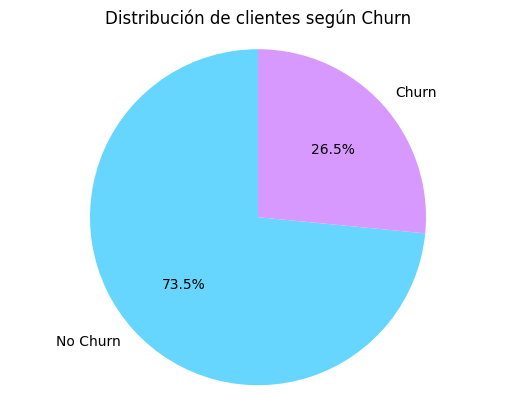

In [27]:
import matplotlib.pyplot as plt


df_filtrado = df_final[df_final['Churn'].isin([0, 1])]


conteo = df_filtrado['Churn'].value_counts().sort_index()


etiquetas = ['No Churn', 'Churn']
valores = [conteo.get(0, 0), conteo.get(1, 0)]


plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=["#66d6ff", "#d899ff"])
plt.axis('equal')
plt.title('Distribuci√≥n de clientes seg√∫n Churn')
plt.show()

In [15]:
# evasi√≥n vs genero
evasion_genero  = pd.crosstab(df_final['gender'], df_final['Churn'])

# Hacer grafico

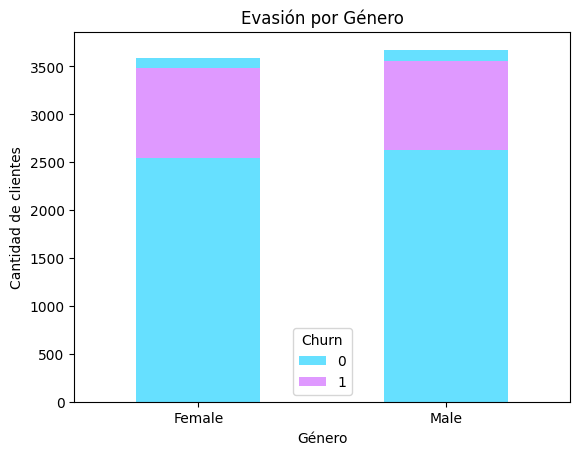

In [28]:
import matplotlib.pyplot as plt

# Usamos el crosstab que ya tienes
evasion_genero = pd.crosstab(df_final['gender'], df_final['Churn'])

# Crear gr√°fico de barras apiladas
evasion_genero.plot(kind='bar', stacked=True, color=["#66e0ff", "#df99ff"])

plt.title('Evasi√≥n por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)  # Para que las etiquetas de eje X est√©n horizontales
plt.legend(title='Churn')
plt.show()

In [16]:
# evasi√≥n vs tipo de contrato

evasion_contrato = pd.crosstab(df_final['Contract'],df_final['Churn'])
evasion_contrato

# Hacer grafico


Churn              0     1     
Contract                       
Month-to-month  2220  1655  130
One year        1307   166   46
Two year        1647    48   48

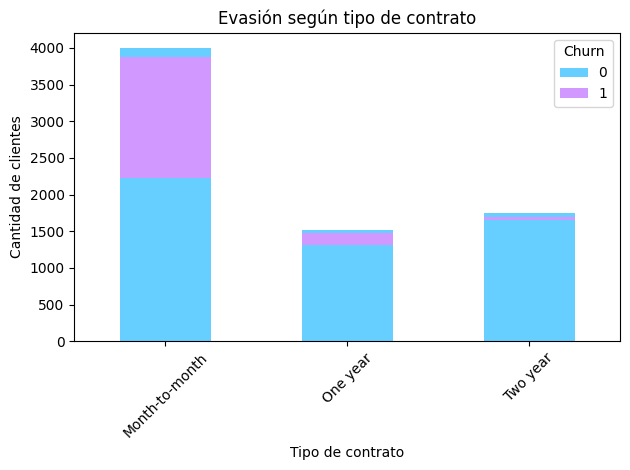

In [29]:
import matplotlib.pyplot as plt

# Usando la tabla de contingencia correcta
evasion_contrato.plot(kind='bar', stacked=True, color=["#66cfff", "#d199ff"])

plt.title('Evasi√≥n seg√∫n tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [17]:
# evasion vs m√©todo de pago
evasion_fpago = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'])

# Hacer grafico

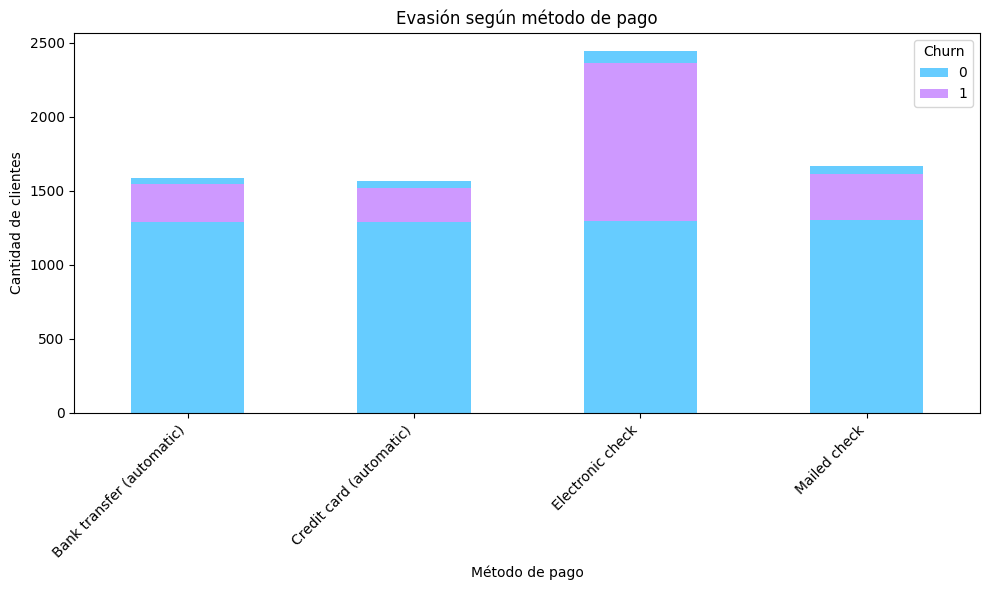

In [30]:
import matplotlib.pyplot as plt

# Asumiendo que ya tienes evasion_fpago con el crosstab
# evasion_fpago = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'])

# Graficar barras apiladas
evasion_fpago.plot(kind='bar', stacked=True, color=["#66ccff", "#ce99ff"], figsize=(10,6))

plt.title('Evasi√≥n seg√∫n m√©todo de pago')
plt.xlabel('M√©todo de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')  # Rota y alinea las etiquetas para mejor lectura
plt.legend(title='Churn')
plt.tight_layout()  # Ajusta el layout para que no se corte nada
plt.show()

#üìÑInforme final

# Introduccion 

Este proyecto corresponde a un trabajo pr√°ctico cuyo prop√≥sito es comprender las razones por las cuales los clientes de Telecom X deciden cancelar sus servicios. Para ello, se llev√≥ a cabo un an√°lisis exhaustivo de datos reales relacionados con ventas y comportamiento de los usuarios

# Objetivo

El objetivo principal es descubrir las causas detr√°s de la p√©rdida de clientes mediante un enfoque basado en el an√°lisis de datos, enfoc√°ndonos en aspectos clave como:

* Comparaci√≥n entre clientes que permanecen y clientes que se dan de baja.

* Relaci√≥n entre evasi√≥n y g√©nero.

* Impacto del tipo de contrato en la tasa de abandono.

* Influencia del m√©todo de pago en la permanencia del cliente.

# Herramientas empleadas

* Python para manipulaci√≥n y an√°lisis de datos.

* Pandas para la gesti√≥n eficiente de la informaci√≥n.

* Matplotlib para la creaci√≥n de visualizaciones gr√°ficas.

* Markdown para documentar y presentar los hallazgos.

# Explorando la Evasi√≥n de Clientes en Telecom X
1. ¬øCu√°ntos se van y cu√°ntos se quedan?
Primero, hicimos un gr√°fico de torta para ver cu√°ntos clientes siguen con el servicio y cu√°ntos se van. Resulta que un buen porcentaje decide dejar la compa√±√≠a, as√≠ que vale la pena entender por qu√© pasa esto.

2. ¬øLa evasi√≥n cambia seg√∫n el g√©nero?
Al comparar hombres y mujeres, vimos que m√°s o menos se van en las mismas proporciones. No hay una diferencia clara que diga que uno u otro g√©nero abandona m√°s.

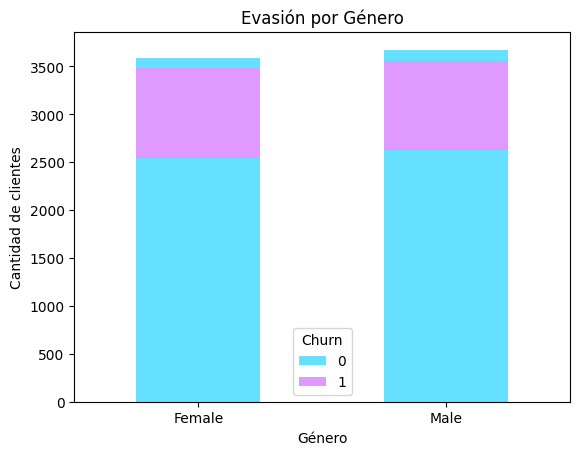

3. ¬øQu√© pasa con el tipo de contrato?
Aqu√≠ s√≠ hubo diferencia: los clientes que tienen contratos mes a mes son los que m√°s se van. No es raro, porque es m√°s f√°cil cancelar ese tipo de contrato. Los que tienen contratos de uno o dos a√±os suelen quedarse m√°s tiempo.

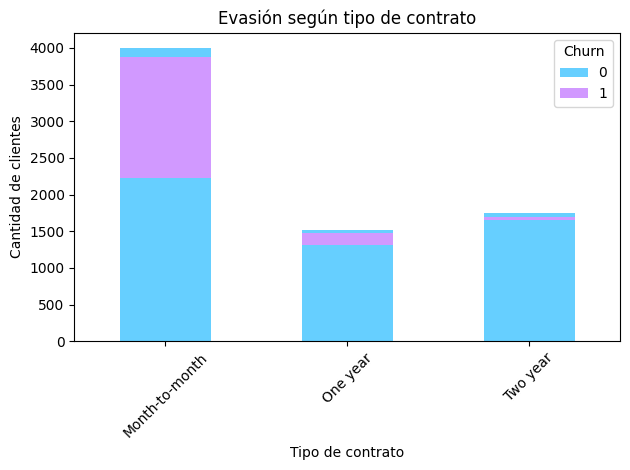

4. ¬øY el m√©todo de pago?
Cuando miramos c√≥mo pagan, notamos que quienes usan cheque electr√≥nico tienden a irse m√°s que los que usan otros m√©todos. Tal vez sea algo que Telecom X deber√≠a revisar para hacerlo m√°s c√≥modo.

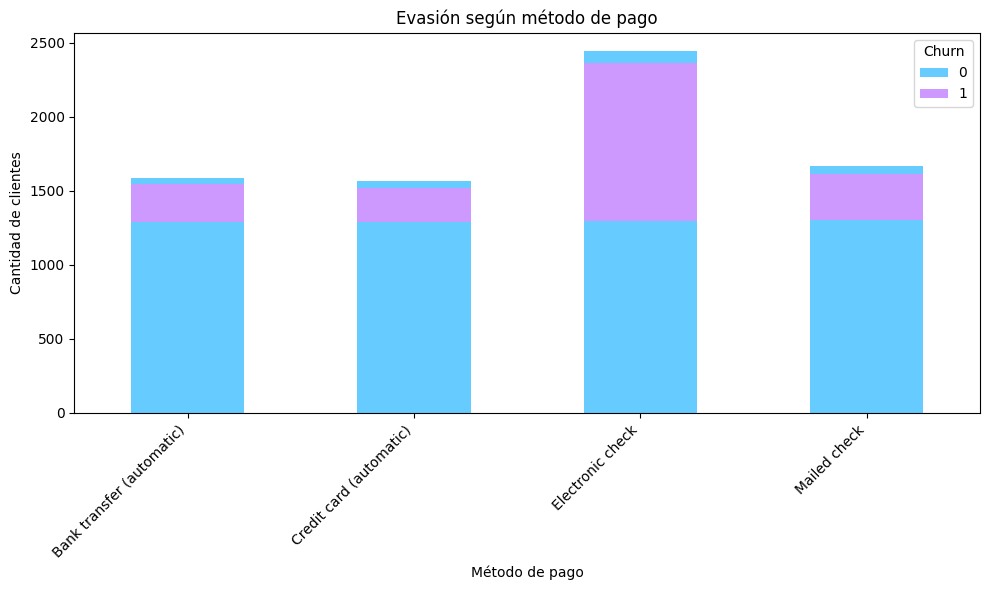

¬øQu√© aprendimos hasta ahora?
Parece que el contrato y el m√©todo de pago influyen bastante en si un cliente se queda o no, mientras que el g√©nero no afecta mucho. As√≠ que, para evitar que m√°s clientes se vayan, Telecom X podr√≠a pensar en ofrecer mejores opciones de contrato y mejorar la experiencia de pago.

# Conclusi√≥n
El an√°lisis de los datos muestra que la tasa de evasi√≥n de clientes en Telecom X est√° m√°s relacionada con el tipo de contrato y el m√©todo de pago que con el g√©nero del cliente. Los contratos mes a mes presentan una mayor tendencia a la cancelaci√≥n, probablemente por su flexibilidad, mientras que los contratos a largo plazo ayudan a retener mejor a los usuarios. Adem√°s, ciertos m√©todos de pago, como el cheque electr√≥nico, parecen estar asociados con mayores tasas de abandono, lo que indica que podr√≠a haber problemas o incomodidades en esa modalidad.

Estos hallazgos sugieren que Telecom X deber√≠a enfocar sus esfuerzos en promover contratos m√°s estables y en mejorar la experiencia de los clientes con m√©todos de pago que presentan mayores √≠ndices de churn, para as√≠ reducir la evasi√≥n y aumentar la fidelidad.